# Test Score Prediction

## Introduction

Test are considered to be the most important things for students. The purpose of test are to measure the student's ability for one or several subjects. Test are measured by the score, and there's usually a benchmark of which the students pass or fail the subject.

There are multiple factors that affects the student's score, such as the school's location, the classroom, methods of teaching, facilities provided by the schools, etc. Based on these factors, I would like to analyze the relationships between the several factors mentioned above ane their test's scores. I also would like to try predicting their test scores based on these factors.

## Goals

The goals are to understand the factor that mostly affected the student's test score, and try to create a prediction on the posttest scores with several regression method with the best performance.

## Limitations

No machine learning model had a 100 percent accuracy in predicting their datasets. Since we are using regression for predicting the test's value, there will be some residual values between the predicted test score and actual test score. I just want to try to create a model with the least residual values.

## Dataset

The dataset were taken from Kaggle, with the title of [Predict Test Scores of Students](https://www.kaggle.com/code/locpham2001/predict-students-test-score-using-linearregression/data). The dataset contains the information of the students, such as the school, the classroom, the school's facilities, the teaching methods, etc.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

## Data Collection

In [2]:
# Loading the dataset
df_score = pd.read_csv('test_scores.csv')

In [3]:
# Splitting the dataset into train and test set
df_score_train, df_score_test = train_test_split(df_score, test_size = 0.2, random_state = 22)

In [4]:
df_score_train.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
2000,ZMNYA,Suburban,Public,V77,Experimental,23.0,B3Z3I,Female,Does not qualify,75.0,94.0
1874,VVTVA,Urban,Public,A93,Experimental,30.0,C1MCZ,Male,Qualifies for reduced/free lunch,31.0,47.0
239,CUQAM,Urban,Public,1Q1,Standard,28.0,KB2DJ,Male,Does not qualify,60.0,74.0
1663,UUUQX,Suburban,Non-public,P8I,Standard,20.0,T570M,Female,Does not qualify,68.0,74.0
1977,ZMNYA,Suburban,Public,4NN,Standard,22.0,4R4Z0,Female,Does not qualify,70.0,81.0


In [5]:
df_score_train.shape

(1706, 11)

The train dataset has 1706 rows and 11 columns.

In [6]:
# Checking the total data and data types.
df_score_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1706 entries, 2000 to 812
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           1706 non-null   object 
 1   school_setting   1706 non-null   object 
 2   school_type      1706 non-null   object 
 3   classroom        1706 non-null   object 
 4   teaching_method  1706 non-null   object 
 5   n_student        1706 non-null   float64
 6   student_id       1706 non-null   object 
 7   gender           1706 non-null   object 
 8   lunch            1706 non-null   object 
 9   pretest          1706 non-null   float64
 10  posttest         1706 non-null   float64
dtypes: float64(3), object(8)
memory usage: 159.9+ KB


The dataset has 10 columns, which contains seven object columns and three numerical columns with float format.

In [7]:
# Checking the null values on the dataset.
df_score_train.isna().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

The dataset does not have null values.

## Exploratory Data Analysis

From this dataset, I would choose the `posttest` columns as the label.

In [8]:
df_score_train['posttest'].describe()

count    1706.000000
mean       67.178195
std        13.908115
min        32.000000
25%        56.000000
50%        68.000000
75%        77.000000
max       100.000000
Name: posttest, dtype: float64

<AxesSubplot:xlabel='posttest', ylabel='Count'>

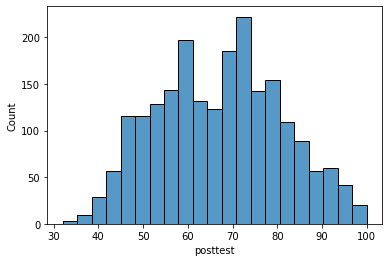

In [9]:
sns.histplot(data=df_score, x='posttest')

The `posttest` column roughly had normal distribution, with average score of 67.18

### Numerical Data

#### n_student

In [10]:
df_score_train['n_student'].describe()

count    1706.000000
mean       22.753810
std         4.232856
min        14.000000
25%        20.000000
50%        22.000000
75%        27.000000
max        31.000000
Name: n_student, dtype: float64

<AxesSubplot:xlabel='n_student', ylabel='Count'>

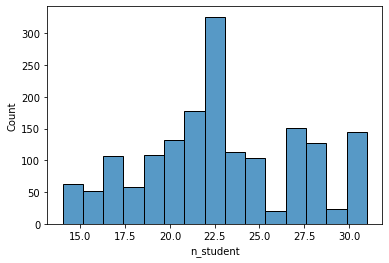

In [11]:
sns.histplot(data=df_score_train, x='n_student')

The `n_student` values between 14 and 31, we could categorize it so it's easier to understand.

In [12]:
# Categorize the n_student values into four category.
def create_bin(x):
    if x <=20:
        return '<20'
    elif 21<x<=25:
        return '21-25'
    elif 26<x<=30:
        return '26-30'
    else:
        return '>30'
    
df_score_train['n_student_bin'] = df_score_train['n_student'].apply(create_bin)

<AxesSubplot:xlabel='n_student_bin', ylabel='count'>

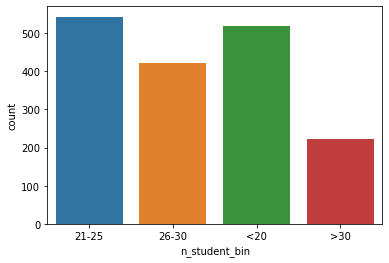

In [13]:
sns.countplot(data=df_score_train, x='n_student_bin')

<AxesSubplot:xlabel='posttest', ylabel='n_student_bin'>

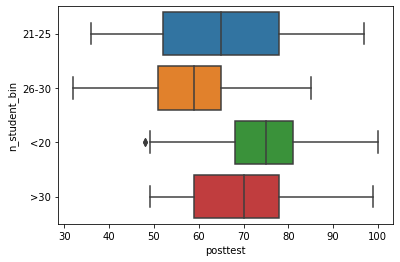

In [42]:
sns.boxplot(data=df_score_train, x='posttest', y='n_student_bin')

<AxesSubplot:xlabel='n_student', ylabel='posttest'>

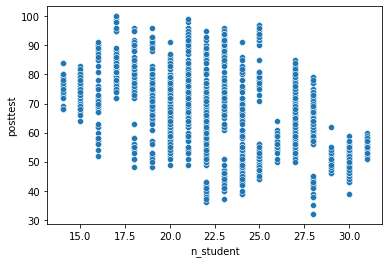

In [15]:
sns.scatterplot(x='n_student', y='posttest', data=df_score_train)

The number of students in a class are mostly between 20 to 26 students. The trend from scatterplot shows that the higher the number of students, the post test score tend to become lower.

#### pretest

In [16]:
df_score_train['pretest'].describe()

count    1706.000000
mean       55.065651
std        13.410781
min        22.000000
25%        45.000000
50%        56.000000
75%        65.000000
max        91.000000
Name: pretest, dtype: float64

<AxesSubplot:xlabel='pretest', ylabel='Count'>

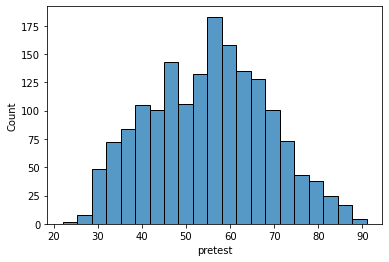

In [17]:
sns.histplot(data=df_score_train, x='pretest')

The `pretest` column is distributed normally, with the average score of 55.06

<AxesSubplot:xlabel='pretest', ylabel='posttest'>

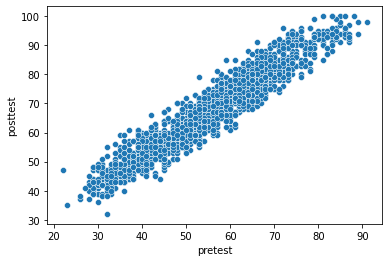

In [18]:
sns.scatterplot(x='pretest', y='posttest', data=df_score_train)

The scatterplot between the `pretest` and `posttest` columns show that the higher the student's pretest score, the higher their post test score.

### Categorical Data

In [19]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [20]:
# Creating the list of categorical data
ctg_cols = ['school', 'school_setting', 'school_type', 'classroom', 'teaching_method', 'gender', 'lunch']

### Count Plot for Categorical Columns

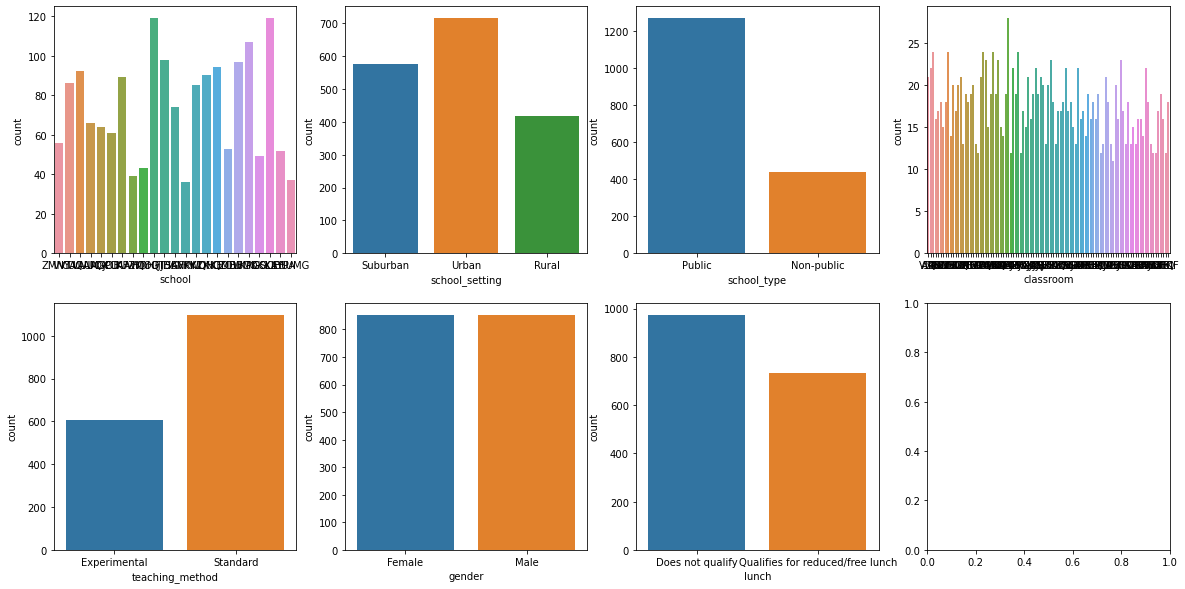

In [21]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
for ix, col in enumerate(ctg_cols):
    sns.countplot(x=col, data=df_score_train, ax=ax.flatten()[ix])

### Box Plot for Categorical Features

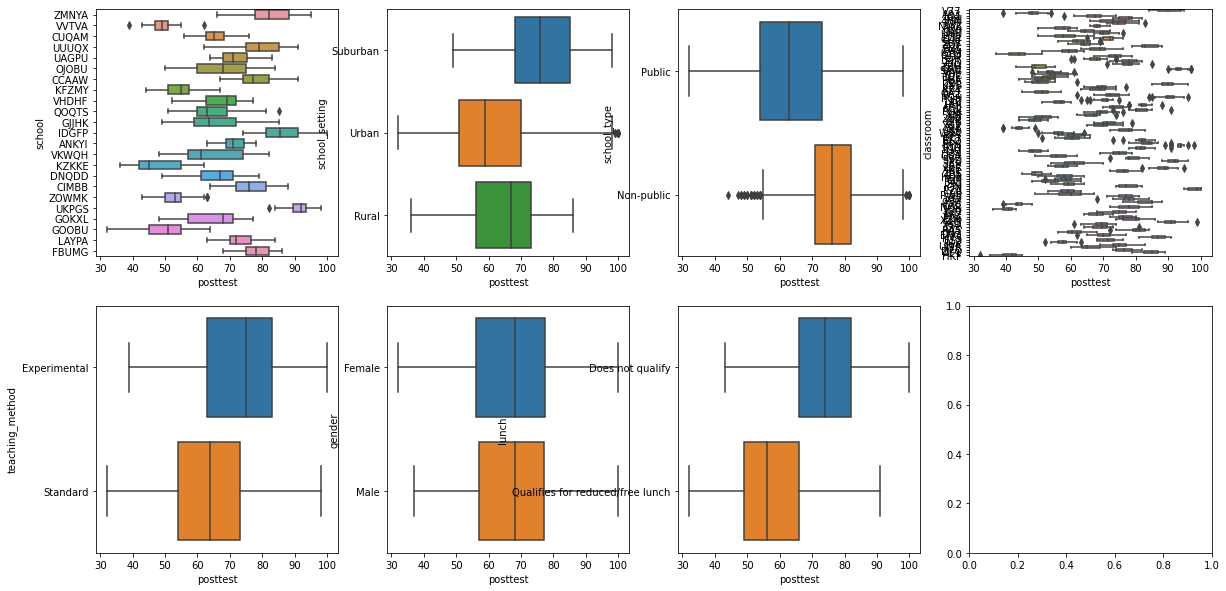

In [22]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
for ix, col in enumerate(ctg_cols):
    sns.boxplot(x='posttest', data=df_score_train, y=col, ax=ax.flatten()[ix])

Both count plot and box plot shows a tremendous amount of unique values from `school` and `classroom` columns. We're going to check the total unique values from both columns.

In [23]:
df_score_train[['school', 'classroom']].nunique()

school       23
classroom    97
dtype: int64

Since there were 23 schools and 97 classrooms, we won't use this columns for further analysis.

### Average Post Test Score by School's Type

In [24]:
avg_score_school = df_score_train.groupby(['school_setting', 'school_type'])['posttest'].mean().round(2).sort_values(ascending=False).reset_index()
avg_score_school

,school_setting,school_type,posttest
0,Suburban,Non-public,78.41
1,Suburban,Public,75.38
2,Urban,Non-public,74.96
3,Rural,Non-public,72.05
4,Rural,Public,62.05
5,Urban,Public,56.63


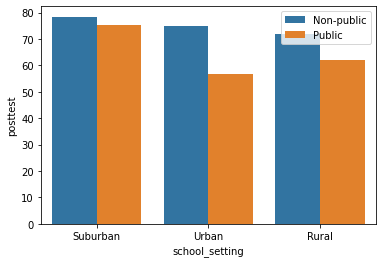

In [25]:
sns.barplot(data=avg_score_school, x='school_setting', y='posttest', hue='school_type')
plt.legend(loc='upper right')

### Average Student's Post Test Score by School's Facilities

In [26]:
avg_score_facilities = df_score_train.groupby(['teaching_method', 'lunch'])['posttest'].mean().round(2).sort_values(ascending=False).reset_index()
avg_score_facilities

,teaching_method,lunch,posttest
0,Experimental,Does not qualify,79.64
1,Standard,Does not qualify,71.34
2,Experimental,Qualifies for reduced/free lunch,63.74
3,Standard,Qualifies for reduced/free lunch,54.37


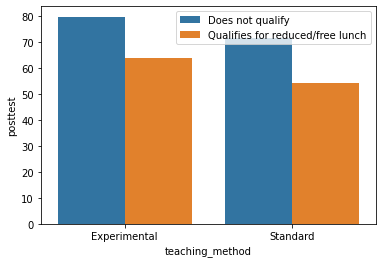

In [27]:
sns.barplot(data=avg_score_facilities, x='teaching_method', y='posttest', hue='lunch')
plt.legend(loc='upper right')

### Correlation between Pre Test, Post Test and Categorical Columns

Since pretest and posttest score had a good correlation, we could use this scatterplot and comparing it between each categorical columns.

In [28]:
# Creating the list of categorical column that used for analysis.
used_ctg_cols = ['school_setting', 'school_type', 'teaching_method', 'lunch']

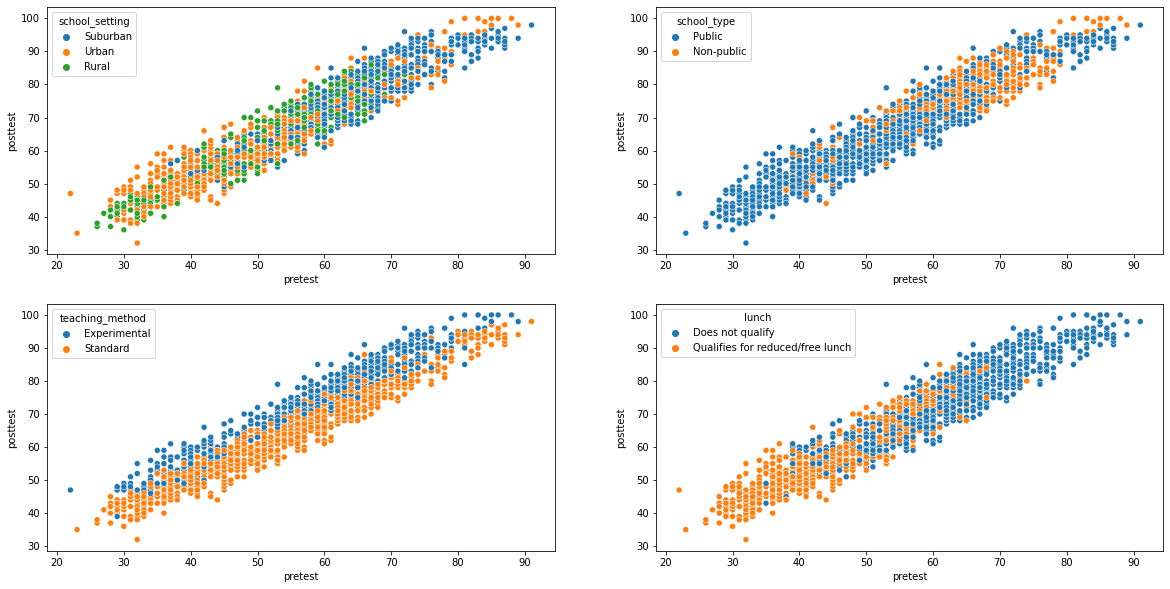

In [29]:
# Creating scatterplots between pretest and posttest score, with selected categorical columns as hue.
fig, ax = plt.subplots(2,2, figsize=(20,10))
for ix, col in enumerate(used_ctg_cols):
    sns.scatterplot(x='pretest', y='posttest', data=df_score_train, hue=col, ax=ax.flatten()[ix])

Some conclusions from the scatterplots :
1. Students living at suburban area had better posttest score, while students living in urban area had the lowest posttest score.
2. Non-public school had higher posttest score than public school.
3. Students taught with experimental method had higher posttest score than student taught with standard method.
4. Student that not qualified for lunch had better score than student that qualifies for lunch.

## Feature Selection and Preprocessing

Based on the analysis, we decided not to used all columns. The columns that not used are : 
- `student_id` --> Student's identity, considered to be a unique value on the dataset.
- `school` --> School's name, too many unique names (23).
- `classroom` --> Classroom's name, too many unique names (97).
- `gender` --> Student's gender, due to social issues, we don't want to use this column.

Numerical data used :
- `n_student`
- `pretest`

Categorical data used : 
- `school_setting`
- `school_type`
- `teaching_method`
- `lunch`

Preprocessing to be performed :
- Performing one hot encoding on categorical columns

### Preprocessing

In [30]:
# Performing a column transformers on a pipeline.
encoded_ctg_cols = ['school_setting', 'school_type', 'teaching_method', 'lunch']
num_cols = ['n_student', 'pretest']

onehot_encoder = OneHotEncoder()
do_nothing = FunctionTransformer()

col_transformer = ColumnTransformer([
    ('encoder', onehot_encoder, encoded_ctg_cols),
    ('do_nothing', do_nothing, num_cols)
])

In [31]:
# Preparing the datasets for model training.
X_train = df_score_train[num_cols + encoded_ctg_cols]
X_test = df_score_test[num_cols + encoded_ctg_cols]
y_train = df_score_train['posttest']
y_test = df_score_test['posttest']

## Model Training

In [34]:
# Preparing pipeline for each model.
lin_reg = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state = 22)
ridge_reg = Ridge(random_state = 22)
lasso_reg = Lasso(random_state = 22)

lin_reg_pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('lin_reg', lin_reg)
])

knn_pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('knn', knn)
])

dt_pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('dt', dt)
])

ridge_pipeline = Pipeline([
    ('col_transofmer', col_transformer),
    ('ridge_reg', ridge_reg)
])

lasso_pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('lasso_reg', lasso_reg)
])

## Model Evaluation

In [35]:
# Creating a dataframe to store the evaluation results
df_model_eval = pd.DataFrame()

# Iterate, train and evaluate each model with pipeline
for pipeline_ in [lin_reg_pipeline, knn_pipeline, dt_pipeline, ridge_pipeline, lasso_pipeline]:
    curr_step_name = list(pipeline_.named_steps.keys())[1]
    cv_scores = cross_validate(pipeline_, X_train, y_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'),
                              return_train_score = True)
    df_model_eval = df_model_eval.append({
        'Algorithm' : pipeline_.named_steps[curr_step_name].__class__.__name__,
        'R-Squared (Train)' : cv_scores['train_r2'].mean(),
        'R-Squared (Test)' : cv_scores['test_r2'].mean(),
        'RMSE (Train)' : cv_scores['train_neg_root_mean_squared_error'].mean() *-1,
        'RMSE (Test)' : cv_scores['test_neg_root_mean_squared_error'].mean() *-1,
        'MAE (Train)' : cv_scores['train_neg_mean_absolute_error'].mean() *-1,
        'MAE (Test)' : cv_scores['test_neg_mean_absolute_error'].mean() *-1
    }, ignore_index=True)

In [36]:
# Displaying the model evaluation results
df_model_eval.sort_values(by='R-Squared (Test)', ascending=False)

,Algorithm,MAE (Test),MAE (Train),R-Squared (Test),R-Squared (Train),RMSE (Test),RMSE (Train)
3,Ridge,2.572462,2.555175,0.946008,0.947039,3.221416,3.199228
0,LinearRegression,2.572508,2.555165,0.946006,0.947039,3.221478,3.199225
1,KNeighborsRegressor,2.732113,2.222331,0.937714,0.959257,3.453270,2.805928
4,Lasso,3.092714,3.083370,0.922550,0.923385,3.857908,3.847799
2,DecisionTreeRegressor,3.051474,1.194867,0.922408,0.981993,3.859964,1.865332


Based on the model evaluation, Ridge had the best R-squared value, but Linear Regression also performed as well as ridge, with the value almost similar between two of them. For this reason, we will analyze further the Linear Regression model.

Text(0, 0.5, 'Actual Posttest Score')

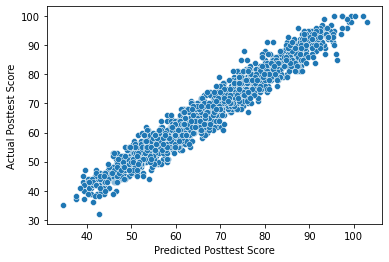

In [37]:
# Error analysis by checking the residual
lin_reg_pipeline.fit(X_train, y_train)
y_pred_train = lin_reg_pipeline.predict(X_train)

sns.scatterplot(x = y_pred_train, y=y_train)
plt.xlabel('Predicted Posttest Score')
plt.ylabel('Actual Posttest Score')

In [38]:
pd.Series(y_pred_train).describe()

count    1706.000000
mean       67.178195
std        13.534391
min        34.531313
25%        56.692802
50%        67.408063
75%        76.940198
max       102.962245
dtype: float64

In [39]:
# Displaying the train dataset that predicted more than 100
more_than_100 = np.argwhere(y_pred_train > 100)[:,0]
df_score_train.iloc[more_than_100]

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,n_student_bin
911,IDGFP,Urban,Non-public,P2A,Experimental,17.0,SH2DM,Male,Does not qualify,88.0,100.0,<20
904,IDGFP,Urban,Non-public,P2A,Experimental,17.0,HXUZG,Male,Does not qualify,89.0,98.0,<20
902,IDGFP,Urban,Non-public,P2A,Experimental,17.0,BYVSP,Male,Does not qualify,86.0,100.0,<20


There are 3 rows that predicted more than the maximum score (100). From the train dataset, the three student's posttest score were close to 100, so it might be possible that the predicted score is higher than the maximum score.

In [40]:
# Feature coefficients
lin_reg_coef = lin_reg_pipeline.named_steps.lin_reg.coef_
feature_names = lin_reg_pipeline['col_transformer'].transformers_[0][1].get_feature_names_out().tolist() + num_cols
df_coef = pd.DataFrame({
    'Feature Names' : feature_names,
    'Coefficient' : lin_reg_coef
})

<AxesSubplot:xlabel='Coefficient', ylabel='Feature Names'>

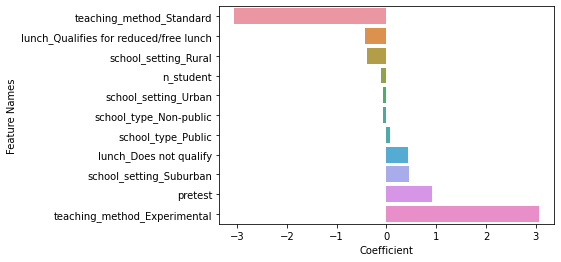

In [41]:
# Plotting the coefficients value
sns.barplot(data=df_coef.sort_values(by='Coefficient'), y='Feature Names', x='Coefficient')

## Conclusion

1. With Regression Linear Model chosen as the best model for this dataset, we could get up to 94,60 percent coefficient of determination (R-squared) and 2,57 mean absolute error (around 2,57 prediction mistakes per student.
2. This considered as a good model performance, although the model itself could be hyperparameter tuned to get an even better performance.
3. By predicting the test values and comparing it to the actual data, we could say that there are some residual values between them, since the model can't predict with 100% accuracy. There are three data that predicted more than the maximum values (100).
4. Students taught with experimental method had the biggest positive influence on their post test score. With improved teaching method, maybe this could affect the post test score more.
